<h1>Heritage Health</h1>
Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

<h2>Initial Data Exploration</h2>

In [ ]:
df = pd.read_csv("../HHP_release3/claims.csv")

In [74]:
df.head()

,MemberID,ProviderID,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,42286978,8013252.0,172193.0,37796.0,Y1,Surgery,Office,28,NaN,8- 9 months,NEUMENT,0,MED,0
1,97903248,3316066.0,726296.0,5300.0,Y3,Internal,Office,50,NaN,7- 8 months,NEUMENT,1-2,EM,0
2,2759427,2997752.0,140343.0,91972.0,Y3,Internal,Office,14,NaN,0- 1 month,METAB3,0,EM,0
3,73570559,7053364.0,240043.0,70119.0,Y3,Laboratory,Independent Lab,24,NaN,5- 6 months,METAB3,1-2,SCS,0
4,11837054,7557061.0,496247.0,68968.0,Y2,Surgery,Outpatient Hospital,27,NaN,4- 5 months,FXDISLC,1-2,EM,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668990 entries, 0 to 2668989
Data columns (total 14 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   MemberID               int64  
 1   ProviderID             float64
 2   Vendor                 float64
 3   PCP                    float64
 4   Year                   object 
 5   Specialty              object 
 6   PlaceSvc               object 
 7   PayDelay               object 
 8   LengthOfStay           object 
 9   DSFS                   object 
 10  PrimaryConditionGroup  object 
 11  CharlsonIndex          object 
 12  ProcedureGroup         object 
 13  SupLOS                 int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 285.1+ MB


In [106]:
df["LengthOfStay"].unique()

array([  0.,   1.,  28.,   2.,   3.,   4.,  14.,  56.,   6.,   5., 182.])

Converting every non-numeric & range variable to numeric:

In [77]:
year = {"Y1": 1, "Y2": 2, "Y3": 3}

df["Year"] = df["Year"].replace(to_replace=year)

In [78]:
dfds = {"0- 1 month": 1, "1- 2 months": 2, "2- 3 months": 3, "3- 4 months": 4, "4- 5 months": 5, "5- 6 months": 6, 
        "6- 7 months": 7, "7- 8 months": 8, "8- 9 months": 9, "9- 10 months": 10, "10- 11 months": 11,
        "11- 12 months": 12}

df["DSFS"] = df["DSFS"].replace(to_replace=dfds)
df["DSFS"] = df["DSFS"].fillna(0)

In [79]:
los = {"1 day": 1, "2 days": 2, "3 days": 3, "4 days": 4, "5 days": 5, "6 days": 6, "1- 2 weeks": 14, 
       "2- 4 weeks": 28, "4- 8 weeks": 56, "26+ weeks": 182}

df["LengthOfStay"] = df["LengthOfStay"].replace(to_replace=los)
df["LengthOfStay"] = df["LengthOfStay"].fillna(0)

In [80]:
ci = {"0": 0, "1-2": 2, "3-4": 4, "5+": 5}

df["CharlsonIndex"] = df["CharlsonIndex"].replace(to_replace=ci)

In [81]:
df["PayDelay"] = df["PayDelay"].replace(to_replace={"162+": 162})
df["PayDelay"] = pd.to_numeric(df["PayDelay"])

The following variables are categorical with several distinct categories:
- Specialty              
- PlaceSvc               
- PrimaryConditionGroup
- ProcedureGroup        

In [83]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# list of columns to be encoded
columns_to_encode = ["Specialty", "PlaceSvc", "PrimaryConditionGroup", "ProcedureGroup"]

# UN-COMMENT FOR ONE-HOT

# # instantiate the one-hot encoder
# ohe = OneHotEncoder()

# # fit and transform the one-hot encoder on the selected columns
# encoded_df = ohe.fit_transform(df[columns_to_encode]).toarray()

# # create a new dataframe with the encoded columns
# encoded_df = pd.DataFrame(encoded_df, columns=ohe.get_feature_names(columns_to_encode))

# # concatenate the original dataframe with the encoded dataframe
# df = pd.concat([df.drop(columns_to_encode, axis=1), encoded_df], axis=1)

# UN-COMMENT FOR LABEL
# instantiate the label encoder
le = LabelEncoder()

# fit and transform the label encoder on the selected columns
df[columns_to_encode] = df[columns_to_encode].apply(lambda col: le.fit_transform(col))

In [101]:
# Dropping unnecessary columns
#df = df.drop("ProviderID", axis=1)
# df = df.drop("MemberID", axis=1)
df

,Vendor,PCP,Year,Specialty,PlaceSvc,PayDelay,LengthOfStay,DSFS,PrimaryConditionGroup,CharlsonIndex,ProcedureGroup,SupLOS
0,172193.0,37796.0,1,11,4,28,0.0,9,27,0,2,0
1,726296.0,5300.0,3,4,4,50,0.0,8,27,2,1,0
2,140343.0,91972.0,3,4,4,14,0.0,1,22,0,1,0
3,240043.0,70119.0,3,5,2,24,0.0,6,22,2,6,0
4,496247.0,68968.0,2,11,6,27,0.0,5,10,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2668985,693028.0,22193.0,2,6,3,58,0.0,1,13,0,1,0
2668986,223304.0,70748.0,3,4,3,23,0.0,1,11,2,1,0
2668987,35565.0,5278.0,3,1,4,122,0.0,5,28,0,10,0
2668988,347045.0,93075.0,3,4,4,151,0.0,2,22,2,1,0


Starting the analysis by looking at a correlation matrix between the different features

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_20292\1682576844.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

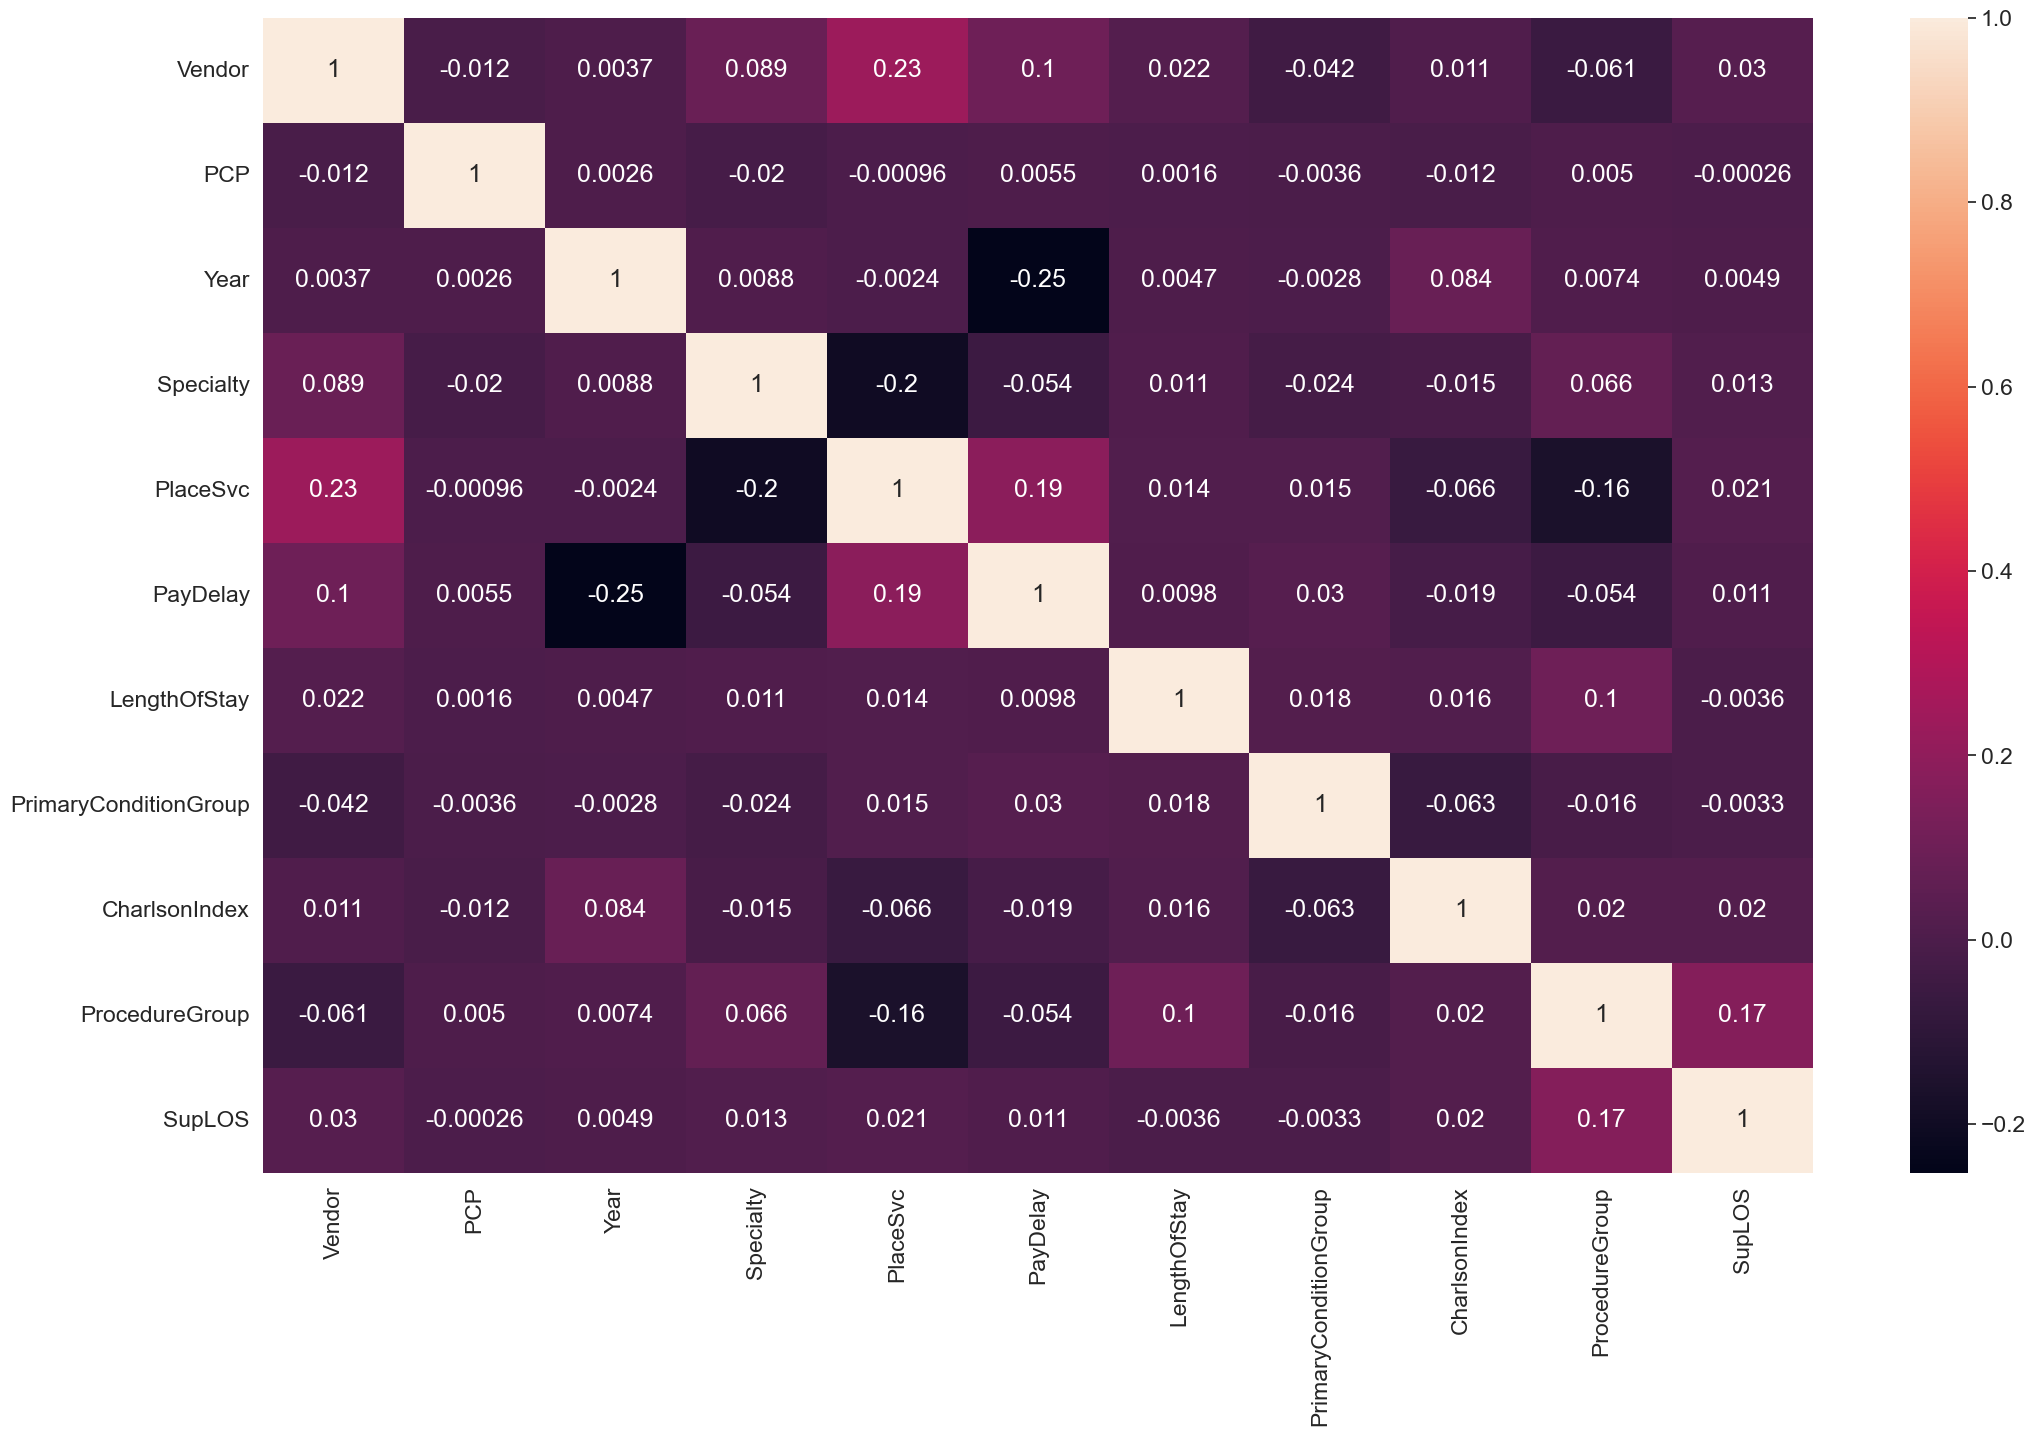

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 15))
sns.set(font_scale=1.5)
sns.heatmap(df.corr(), annot=True)

Creating a simple linear model

In [104]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='LengthOfStay ~ PCP + Year + Specialty + PayDelay + DSFS + PrimaryConditionGroup + CharlsonIndex + ProcedureGroup + SupLOS', data=df)

result = mod.fit()

In [105]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           LengthOfStay   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1680.
Date:                Mon, 13 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:45:45   Log-Likelihood:            -4.2722e+06
No. Observations:             2661498   AIC:                         8.544e+06
Df Residuals:                 2661477   BIC:                         8.545e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.04